# ICOS Labelling plots
Generates plots for use in ICOS Labelling reports.

## Initial Setup
Instructions for setting up in a virtual environment (venv). To be run from the folder containing the notebooks.

1. `python -m venv .venv`
2. `source .venv/bin/activate`
3. `pip install pandas matplotlib jupyter ipykernel`
4. `python -m ipykernel install --user --name=.venv`
5. `jupyter notebook`

Open this notebook and make sure it is running using the `.venv` kernel.


## Subsequent Usage
The initial setup above only needs performing once. After that, you need only run:

1. `source .venv/bin/activate`
2. `jupyter notebook`

## Files
The notebook expects two folders: `input` and `output`.

The `input` folder should contain a subfolder for a station, and within that the uncompressed data from a QuinCe export containing at least the "ICOS OTC Labelling" format file.

The `output` folder can be empty; the notebook will take care of creating the necessary folder structure inside it.

## Notebook Initialisation
The cell below will initialise the notebook ready for use

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import os

## Data Setup
Fill in the variables below to match the details of the data to be processed.

| Variable            | Meaning       |
| ------------------- | ------------- |
| `station_name`      | The name of the station. There should be a folder with the same name in the `input` folder. |
| `dataset`           | The name of the dataset exported from QuinCe. This should be the name of the unzipped export from QuinCe within the folder named after the station name. |


In [2]:
station_name = 'Östergarnsholm'
dataset = 'OSGH20240411'

## General Setup

In [3]:
# Create output folder
output_folder = f'output/{station_name}/{dataset}'
os.makedirs(output_folder, exist_ok=True)

## Load data and set up
Load the data file and perform required pre-preprocessing.

If there is known invalid data in the dataframe, it must be removed here.

In [4]:
datapath=f'input/{station_name}/{dataset}/dataset/ICOS OTC Labelling/{dataset}.csv'
df=pd.read_csv(datapath)

# Reset dataset indices
df = df.reindex()

# Extract timestamps
dt=pd.to_datetime(df['Date/Time'])

# Default x axis (time)
x = dt

## Water pCO2

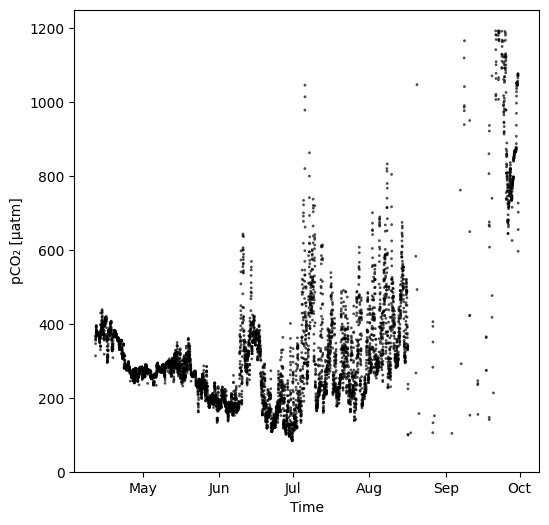

In [5]:
y_min = 0
y_max = 1250


y = df['pCO2 In Water - Equilibrator Temperature [uatm]'].values

# Create a scatter plot
plt.figure(figsize=(6, 6))  # Optional: set the figure size

# Only show Good values
condition = df['pCO2 In Water - Equilibrator Temperature [uatm] QC Flag']== 2

# Scatter plot for points with y >= 20 (black)
plt.scatter(x[condition], y[condition],s=1, marker='o', edgecolor='black',facecolors='none', label='y >= 20', alpha=0.7)

# Format the x-axis tick labels to show only months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))



# Add labels to the x and y axes
plt.xlabel('Time')
plt.ylabel('pCO₂ [μatm]')
plt.ylim(y_min, y_max)

# Add a title if needed
plt.title('')

# Specify the file path and name
output_path = f'{output_folder}/9.fCO2_own-range.png'


# Save the plot as a PNG file with high quality
plt.savefig(output_path, dpi=400, bbox_inches='tight')

# Show the plot (optional)
plt.show()

## SST

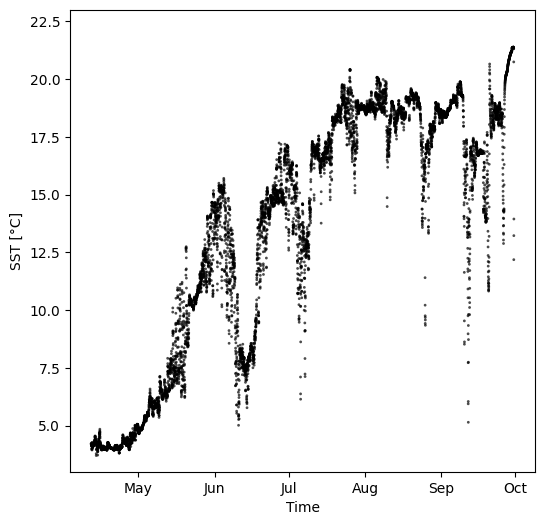

In [6]:
y_min = 3
y_max = 23

x = dt
y = df['Temperature C'].values

# Create a scatter plot
plt.figure(figsize=(6, 6))  # Optional: set the figure size

# Only show good values
condition = df['Temperature C QC Flag']== 2

# Scatter plot for points with y >= 20 (black)
plt.scatter(x[condition], y[condition],s=1, marker='o', edgecolor='black',facecolors='none', label='y >= 20', alpha=0.7)

# Format the x-axis tick labels to show only months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Add labels to the x and y axes
plt.xlabel('Time')
plt.ylabel('SST [°C]')
plt.ylim(y_min, y_max)

# Specify the file path and name
output_path = f'{output_folder}/2.Equil_temp_plot_own-range.png'

# Save the plot as a PNG file with high quality
plt.savefig(output_path, dpi=400, bbox_inches='tight')

# Show the plot (optional)
plt.show()

## Data Stats

### Main stats (for table 4.2)

In [12]:
stat_columns = [
    ['Intake Temperature', 'Temperature C'],
    ['Sea Surface pCO₂', 'pCO2 In Water - Equilibrator Temperature [uatm]']
]

for (name, col) in stat_columns:

    total_measurements = df.count()[col]
    good_measurements = len(df[df[f'{col} QC Flag'] == 2])
    qc_comments = df[f'{col} QC Comment'].value_counts().sort_values(ascending=False)
    
    print(name)
    print(f'Total measurements: {total_measurements}')
    print(f'Good measurements: {good_measurements} ({good_measurements / total_measurements * 100:.1f}%)')
    print()
    for comment in qc_comments.index.tolist():
        print(f'{comment}: {qc_comments[comment]} ({qc_comments[comment] / total_measurements * 100:.1f}%)')
    print()
    print()


Intake Temperature
Total measurements: 8235
Good measurements: 8197 (99.5%)

Constant for too long: 38 (0.5%)


Sea Surface pCO₂
Total measurements: 6623
Good measurements: 6419 (96.9%)

Out of range: 170 (2.6%)
Out of range;Changes too quickly: 22 (0.3%)
Changes too quickly: 6 (0.1%)
Out of range;Standard deviation is too large: 6 (0.1%)




In [8]:
print(f'Total rows: {len(df)}')

Total rows: 8235


#### Atmospheric xCO₂

In [9]:
atmco2_col = 'xCO2 In Atmosphere - Calibrated In Dry Air [mol mol-1]'
atm_count = df.count()[atmco2_col]
print(f'Atmospheric xCO₂ count: {atm_count}')

atm_low = len(df[df[atmco2_col] < 300])
atm_high = len(df[df[atmco2_col] > 500])
print(f'Atm CO2 out of range: {atm_low + atm_high} ({(atm_low + atm_high) / atm_count * 100:.1f}%)')

KeyError: 'xCO2 In Atmosphere - Calibrated In Dry Air [mol mol-1]'

#### Oxygen

In [ ]:
o2_col = 'Oxygen'
o2_count = df.count()[o2_col]
print(f'Oxygen rows: {o2_count}')

o2_low = len(df[df[o2_col] < 50])
o2_high = len(df[df[o2_col] > 400])
print(f'O2 out of range: {o2_low + o2_high} ({(o2_low + o2_high) / o2_count * 100:.1f}%)')


#### ∆T

In [ ]:
delta_t_col = 'Water-Equilibrator Temperature Difference [°C]'
abs_delta_t = abs(df[delta_t_col])

delta_t_count = abs_delta_t.count()

print(f'Total ∆T values: {delta_t_count}')

delta_t_out_of_range = len(abs_delta_t[abs_delta_t > 1])

print(f'∆T out of range = {delta_t_out_of_range} ({delta_t_out_of_range / delta_t_count * 100:.1f}%)')
